# Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(10000000)

# Classes

In [3]:
class GeneradorLineal():
    def __init__(self,A=7**5,C=0,M=2**31 -1,seed=1234):
        self.A= A
        self.C= C
        self.M= M
        self.seed= seed
        self.ls_num= []
    def aleatorios(self,samples):
        if(samples==0):
            return self.ls_num
        else:
            sn= (self.A*self.seed + self.C) %self.M
            self.ls_num.append(self.seed/self.M)
            self.seed= sn
            samples-=1
            return(self.aleatorios(samples))

In [18]:
class ROC ():
    
    def __init__(self, threslhold=10000, decrement=-1, tpr=[], fpr=[], auc=0):
        self.threshold= threslhold
        self.decrement= decrement
        self.tpr= tpr
        self.fpr = fpr
        self.auc= auc
        
    def getROC(self,y,y_pro):
        for j in range(self.threshold,0,self.decrement):
            tp= (np.greater(y_pro,j/self.threshold) & np.equal(y,1)).sum()
            tn= (np.less(y_pro,j/self.threshold) & np.equal(y,0)).sum()
            fp= (np.greater(y_pro,j/self.threshold) & np.equal(y,0)).sum()
            fn= (np.less(y_pro,j/self.threshold) & np.equal(y,1)).sum()
            tpr= tp/(tp+fn)
            fpr= fp/(fp+tn)
            self.tpr.append(tpr)
            self.fpr.append(fpr)
        return self.fpr, self.tpr
    
    def aproximateACU(self,n=20000):
        U= GeneradorLineal(seed=122)
        U2= GeneradorLineal(seed=111)
        X= U.aleatorios(n)
        Y= U2.aleatorios(n)
        above= 0
        for i,x in enumerate(X):
            index= np.argmax(np.greater(np.array(self.fpr), x).astype(int))
            if (Y[i] <= self.tpr[index]):
                above+=1
        self.auc= above/n
        return self.auc
    

# Data

In [5]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

In [6]:
#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)
y_pred_proba = log_regression.predict_proba(X_test)[::,1]

# ROC & Gini

## With ROC class

In [19]:
roc_test= ROC()
fprC,tprC= roc_test.getROC(np.array(y_test),np.array(y_pred_proba))
aucC= roc_test.aproximateACU()
giniC= 2*aucC -1

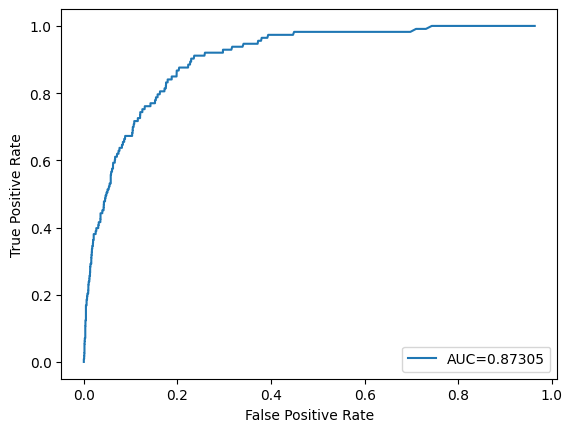

In [20]:
plt.plot(fprC,tprC,label="AUC="+str(aucC))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## With Sklearn

In [10]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
gini= 2*auc -1

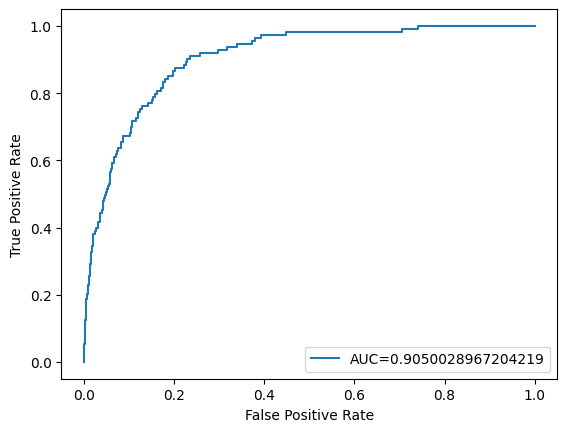

In [11]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Results

In [24]:
print(f'AUC con montecarlo : {aucC}, Gini con motecarlo: {giniC}\nAUC con sklearn : {auc}, Gini con sklearn: {gini}')

AUC con montecarlo : 0.87305, Gini con motecarlo: 0.7461
AUC con sklearn : 0.9050028967204219, Gini con sklearn: 0.8100057934408438


En cuanto a la generación de **ROC** tenemos gráficas muy parecidad y en medida que se aumenta el valor del **threshold** (ante mayor el número se iterá sobre más probabilidades y es más parecida la gráfica).  
Por su parte **AUC** con la clase generada queda inferior por $.04$ con respecto a lo obtenido en sklearn, esto esta relacionado a la forma de integrar ya que mi aproximación es por rectangulos y entre más exacto sea la generación de ROC se tendrá un resultado más cercano. 
En conclusión se obtuvieron resultados muy cercanos a la realidad.